Found 315 images belonging to 3 classes.
Found 135 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.4777 - loss: 1.0410 - val_accuracy: 0.9704 - val_loss: 0.4089
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - accuracy: 0.9896 - loss: 0.1645 - val_accuracy: 0.9407 - val_loss: 0.2341
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9883 - loss: 0.0259 - val_accuracy: 0.8889 - val_loss: 0.6758
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 8.4739e-04
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 1.0000 - loss: 9.9429e-04 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 1.0000 - loss: 8.7849e-06 - val_accuracy: 0.9926 - val_loss: 0.0349
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 1.0000 - loss: 8.7993e-05 - val_accuracy: 0.9926 - val_loss: 0.0502
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 1.0000 - loss: 8.8675e-05 - val_accuracy:

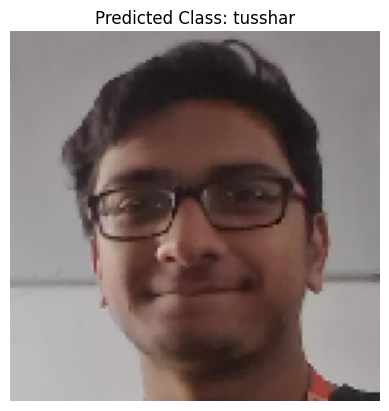

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Image data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/training_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data/test_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Custom CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

# Function to predict and show image with the label
def predict_and_show_image(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()

# Example usage
new_image_path = '/content/Screenshot 2024-11-04 123758.png'  # Replace with your image path
predict_and_show_image(new_image_path, model)
